### Load returns

In [1]:
import pandas as pd

returns = pd.read_csv("../data/processed/market_returns.csv",
                      index_col=0, parse_dates=True)
returns.head()


,AAPL,MSFT,GOOG,META,AMZN
Date,,,,,
2024-01-03,-0.007488,-0.000728,0.005733,-0.005256,-0.009738
2024-01-04,-0.012700,-0.007178,-0.016529,0.007693,-0.026268
2024-01-05,-0.004013,-0.000516,-0.004709,0.013915,0.004634
2024-01-08,0.024175,0.018872,0.022855,0.019065,0.026577
2024-01-09,-0.002263,0.002936,0.014445,-0.003430,0.015225


In [2]:
assets = ["AAPL", "MSFT", "GOOG"]
ret = returns[assets].dropna()

### Compute Volatility

In [3]:
# Annualized:
vol = ret.std() * (252**0.5)
vol


AAPL    0.285258
MSFT    0.224161
GOOG    0.299281
dtype: float64

### Simple Risk Parity Weights

> Risk parity is an investment strategy that allocates capital across different assets based on their contribution to total portfolio risk, aiming to have each asset class contribute an equal amount of risk to the portfolio's overall volatility.

In [4]:
inv_vol = 1 / vol
weights = inv_vol / inv_vol.sum()
weights


AAPL    0.310010
MSFT    0.394506
GOOG    0.295484
dtype: float64

### Portfolio Returns

In [5]:
portfolio_ret = (ret * weights).sum(axis=1)
portfolio_ret.head()


Date
2024-01-03   -0.000915
2024-01-04   -0.011653
2024-01-05   -0.002839
2024-01-08    0.021693
2024-01-09    0.004725
dtype: float64

<Axes: title={'center': 'Risk Parity Portfolio Equity Curve'}, xlabel='Date'>

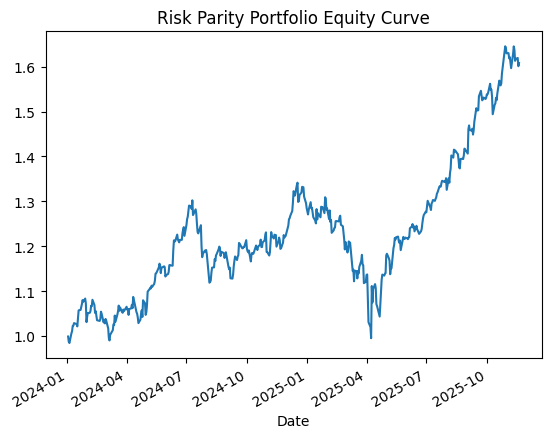

In [6]:
equity = (1 + portfolio_ret).cumprod()
equity.plot(title="Risk Parity Portfolio Equity Curve")


### Portfolio Metrics

In [7]:
import numpy as np

def sharpe(x):
    return np.sqrt(252) * x.mean() / x.std()

print("Sharpe:", sharpe(portfolio_ret))
print("Volatility:", portfolio_ret.std() * (252**0.5))


Sharpe: 1.2840769158315384
Volatility: 0.21493177128424526


### Max Drawdown

In [8]:
import numpy as np
import pandas as pd

def max_drawdown(equity: pd.Series) -> float:
    """
    equity: cumulative equity curve (e.g. (1+returns).cumprod())
    returns: minimum drawdown as a negative fraction (e.g. -0.25 = -25%)
    """
    peak = equity.cummax()
    drawdown = (equity - peak) / peak
    return drawdown.min()


In [9]:
mdd = max_drawdown(equity)
print("Max Drawdown (Risk Parity Portfolio):", mdd)
print("Max Drawdown %:", mdd * 100)


Max Drawdown (Risk Parity Portfolio): -0.25805461312180544
Max Drawdown %: -25.805461312180544


### Correlation Heatmap of Portfolio Assets

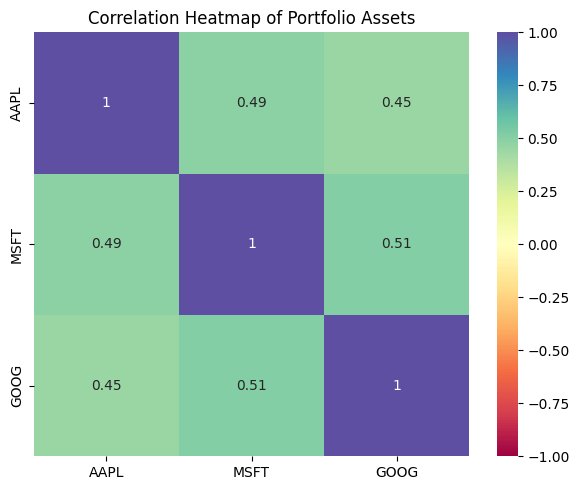

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(ret.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Portfolio Assets")
plt.tight_layout()
plt.show()
